#Forecasting (Long-Term Savings Growth)

### Data Preparation

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np

# set random seed for reproducibility
np.random.seed(42)

# define the number of rows
num_rows = 1000

# generate a date range for the monthly data
date_range = pd.date_range(start='2010-01-01', periods=num_rows, freq='M')


# generate random monthly contributions between R100 to R20000
monthly_contributions = np.random.randint(100,20000,size=num_rows)

# generate random historical performance percentages between -10% to 20%
historical_performance = np.random.uniform(-0.10, 0.20, size=num_rows)

# generate random external economic indicaors
external_economic_conditions =  np.random.uniform(-0.05, 0.15, size=num_rows)

# create a dataframe with the generated data
df = pd.DataFrame({
    'Date':date_range,
    'MonthlyContributions':monthly_contributions,
    'HistoricalPerformance':historical_performance,
    'stock_market':external_economic_conditions
})


# simulate the growth of savings in the locked pot using cumulative sum of contributions and historical performance
# assume the initial savings of the employee were 0


initial_savings = 0
df['LockedPotValue'] = initial_savings

for i in range(1, len(df)):
  df.loc[i,'LockedPotValue'] = df.loc[i-1,'LockedPotValue']*(1 + df.loc[i, 'HistoricalPerformance']) + df.loc[i, 'MonthlyContributions']


# save the dataset as a csv file
df.to_csv('mock_locked_pot_dataset.csv', index=False)

print('Dataset created successfully!')

<ipython-input-1-175a4a6fcfac>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2010-01-01', periods=num_rows, freq='M')
<ipython-input-1-175a4a6fcfac>:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6488.121635227818' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,'LockedPotValue'] = df.loc[i-1,'LockedPotValue']*(1 + df.loc[i, 'HistoricalPerformance']) + df.loc[i, 'MonthlyContributions']


Dataset created successfully!


 created this dataset because I could not find an existing dataset that had all necessary columns to forecast long ter savings from their closed pot. Most available dataset lacked critical components such as LockedPotValue and income levels.

In [2]:
df = pd.read_csv("/content/mock_locked_pot_dataset.csv")
df.head()

,Date,MonthlyContributions,HistoricalPerformance,stock_market,LockedPotValue
0,2010-01-31,15895,0.159055,0.141965,0.000000
1,2010-02-28,960,0.176888,0.045651,960.000000
2,2010-03-31,5490,0.039710,0.129163,6488.121635
3,2010-04-30,12064,0.044251,0.014443,18839.228112
4,2010-05-31,11384,0.175536,-0.024953,33530.198723


In [3]:
df.columns

Index(['Date', 'MonthlyContributions', 'HistoricalPerformance', 'stock_market',
       'LockedPotValue'],
      dtype='object')

In [5]:
# prophet expects columns named 'ds' for date and 'y' for the value predicted
df_prophet = df.rename(columns={'Date':'ds','LockedPotValue':'y'})

# preview the prophet dataframe
df_prophet.head()

,ds,MonthlyContributions,HistoricalPerformance,stock_market,y
0,2010-01-31,15895,0.159055,0.141965,0.000000
1,2010-02-28,960,0.176888,0.045651,960.000000
2,2010-03-31,5490,0.039710,0.129163,6488.121635
3,2010-04-30,12064,0.044251,0.014443,18839.228112
4,2010-05-31,11384,0.175536,-0.024953,33530.198723


### Data Modelling - Facebook Prophet

In [7]:
from prophet import Prophet

# initialize prophet model
model = Prophet()

# fit the model
model.fit(df_prophet)

# create a future dataframe
future = model.make_future_dataframe(periods=12, freq='M')

# make predictions based on future dataframe
forecast = model.predict(future)

# show forecast results
forecast.head()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpztmza_jk/3cfi30kn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpztmza_jk/0_r85c3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68425', 'data', 'file=/tmp/tmpztmza_jk/3cfi30kn.json', 'init=/tmp/tmpztmza_jk/0_r85c3h.json', 'output', 'file=/tmp/tmpztmza_jk/prophet_modelpws8e4ve/prophet_model-20241017124042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,7.830368e+22,-3.220397e+24,3.402693e+24,7.830368e+22,7.830368e+22,3.652575e+22,3.652575e+22,3.652575e+22,3.652575e+22,3.652575e+22,3.652575e+22,0.0,0.0,0.0,1.148294e+23
1,2010-02-28,7.814876e+22,-3.123194e+24,3.345739e+24,7.814876e+22,7.814876e+22,9.458883e+22,9.458883e+22,9.458883e+22,9.458883e+22,9.458883e+22,9.458883e+22,0.0,0.0,0.0,1.727376e+23
2,2010-03-31,7.797724e+22,-3.233323e+24,3.321433e+24,7.797724e+22,7.797724e+22,6.632524e+22,6.632524e+22,6.632524e+22,6.632524e+22,6.632524e+22,6.632524e+22,0.0,0.0,0.0,1.443025e+23
3,2010-04-30,7.781126e+22,-3.103797e+24,3.161656e+24,7.781126e+22,7.781126e+22,1.600297e+22,1.600297e+22,1.600297e+22,1.600297e+22,1.600297e+22,1.600297e+22,0.0,0.0,0.0,9.381423e+22
4,2010-05-31,7.763974e+22,-3.362182e+24,3.131648e+24,7.763974e+22,7.763974e+22,-1.497015e+23,-1.497015e+23,-1.497015e+23,-1.497015e+23,-1.497015e+23,-1.497015e+23,0.0,0.0,0.0,-7.206172e+22


### Data Visualisation

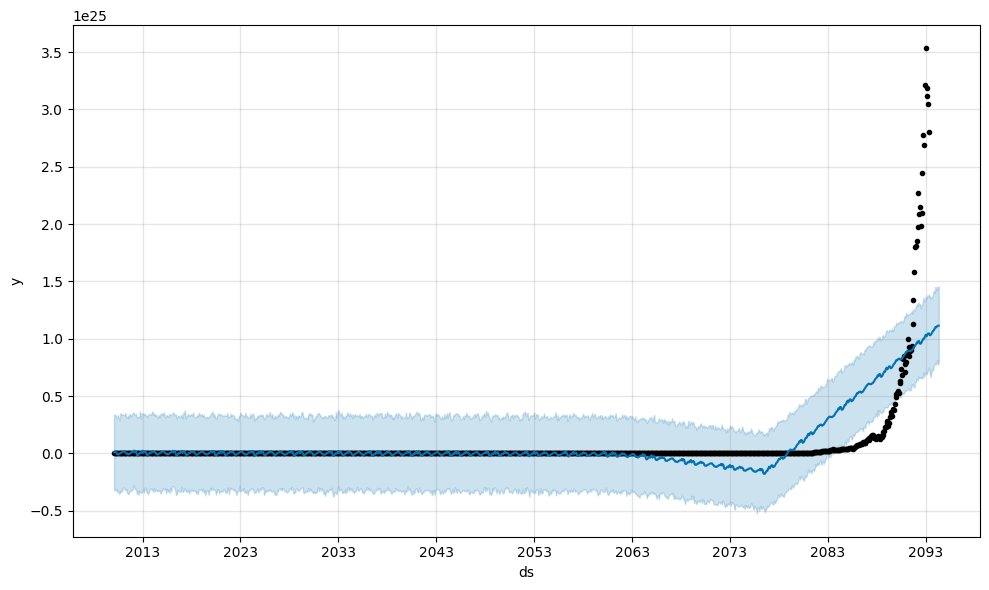

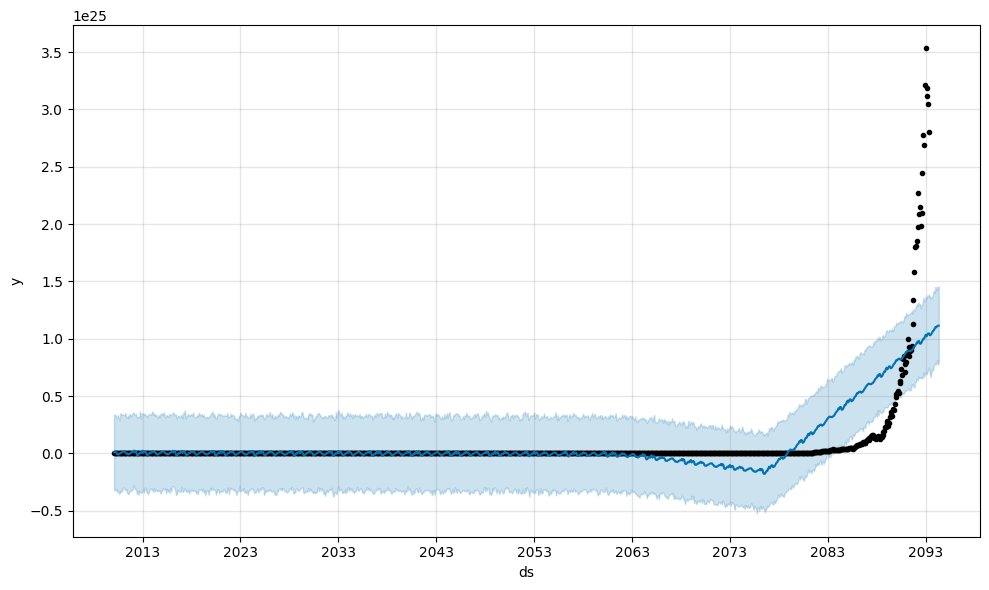

In [8]:
# note that yhat is the predicted value and yhat_lower and yaht_upper are the lower and upper bounds of the prediction interval
# plot the forecast
model.plot(forecast)

from the above visualisation we can see that the long term savings are stationary from year 2013 up to 2063, this may be because there has been a slight growth, and then from 2087 there is a rapid growth in the savings. This may be caused by the type of growth the employee has chosen for his or her closed pot.

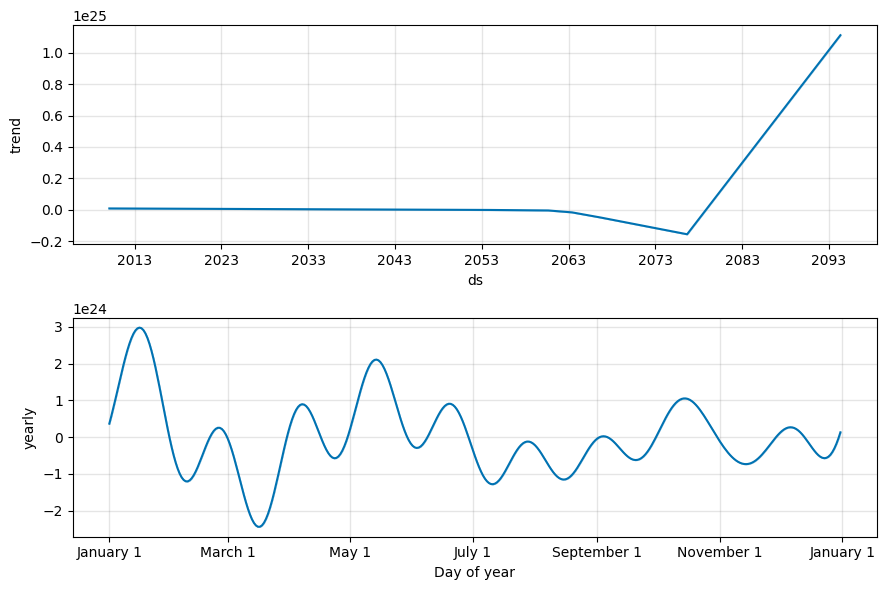

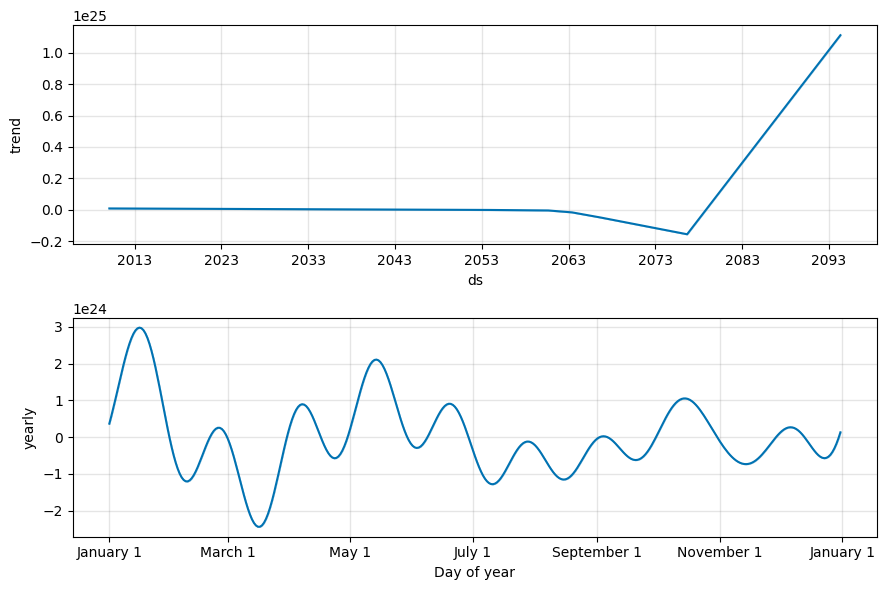

In [9]:
# plot forecast components
model.plot_components(forecast)

From the above graphs we can see that the trend is stationary up to 2063 then it drops after 2075 it increases rapidly again. Meanwhile yearly there is growth.

In [10]:
# evaluate the model

from prophet.diagnostics import cross_validation, performance_metrics

# perfrm cross validation to evaluate model
df_cv = cross_validation(model,initial='730 days',period='180 days',horizon='365 days')

# calculate performace metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Making 163 forecasts with cutoffs between 2012-06-29 00:00:00 and 2092-04-30 00:00:00


  0%|          | 0/163 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpztmza_jk/s68mazeo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpztmza_jk/ua3kjj0f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25637', 'data', 'file=/tmp/tmpztmza_jk/s68mazeo.json', 'init=/tmp/tmpztmza_jk/ua3kjj0f.json', 'output', 'file=/tmp/tmpztmza_jk/prophet_modelwprnutct/prophet_model-20241017125049.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:50:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpztmza_jk/lyls26xi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpztmza_jk/0afossle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,2.805573e+48,1.674984e+24,3.072399e+23,0.440591,0.481331,0.607351,0.021538
1,38 days,2.807733e+48,1.675629e+24,3.099151e+23,0.442413,0.486103,0.610340,0.020513
2,39 days,2.806734e+48,1.675331e+24,3.087358e+23,0.445193,0.486573,0.614606,0.020513
3,40 days,2.807309e+48,1.675502e+24,3.102945e+23,0.446718,0.487310,0.616657,0.020513
4,41 days,2.804240e+48,1.674587e+24,3.072219e+23,0.447254,0.487310,0.617148,0.020513
